## Churn Prediction

Churn prediction is one of the most popular Big Data use cases in business. It consists of detecting which customers are likely to cancel a subscription to a service based on how they use the service. We want to predict the answer to the following question, asked for each current customer: “Is this customer going to leave us within the next X months?” There are only two possible answers, yes or no, and it is what we call a binary classification task. 

Here, the input to the model is customer profile information and the objective is to predict whether a customer is likely to cancel their service subscription
             
Being able to predict churn based on customer data has proven extremely valuable to big telecom companies & Financial services.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score,f1_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
%matplotlib inline

Data Collection-- 
Data Exploration--
Exploratory Analysis
Feature Pre-processing
Build the Model
Evaluate & Test the model
Service Deployment (Flask)

### Data Collection

In [2]:
churn_df = pd.read_csv(r'C:\Users\Akash\Documents\Churn Prediction\train.csv')

### Data Exploration

In [3]:
churn_df.columns #Let's see how many columns this dataset has

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [4]:
churn_df.churn.value_counts() 

no     3652
yes     598
Name: churn, dtype: int64

In [5]:
#Let's see how the dataset looks like (with top 5 rows)
churn_df.head() 

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [6]:
#Let's see how the dataset looks like (with last 5 rows) 

churn_df.tail()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no
4249,VT,86,area_code_415,no,yes,34,129.4,102,22.00,267.1,104,22.70,154.8,100,6.97,9.3,16,2.51,0,no


In [7]:
#Showing the shape of the dataset
print(churn_df.shape) 

(4250, 20)


In [8]:
#Let's see the data type and number of non-null records for each column of the dataset
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

Looking the statistical details of the dataset with both the different target values separately

In [9]:
churn_df[churn_df['churn'] == 'yes'].describe() # with the target value as 'Yes'

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,102.137124,4.299331,208.990134,100.478261,35.528679,209.964883,99.841137,17.847207,206.331773,99.209030,9.285033,10.632441,4.217391,2.871254,2.275920
std,39.369162,11.124649,69.183493,20.988919,11.761417,51.312321,19.752909,4.361545,48.959820,20.263378,2.203215,2.794494,2.626925,0.754413,1.827334
min,2.000000,0.000000,0.000000,0.000000,0.000000,70.900000,48.000000,6.030000,47.400000,42.000000,2.130000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,0.000000,151.175000,87.000000,25.697500,172.150000,87.000000,14.635000,172.825000,84.000000,7.780000,8.800000,2.000000,2.380000,1.000000
50%,101.000000,0.000000,220.550000,101.000000,37.495000,210.200000,99.500000,17.870000,206.100000,99.000000,9.275000,10.600000,4.000000,2.860000,2.000000
75%,125.000000,0.000000,266.975000,114.000000,45.385000,248.100000,113.000000,21.090000,241.250000,114.000000,10.857500,12.700000,5.000000,3.430000,4.000000
max,225.000000,48.000000,351.500000,165.000000,59.760000,349.400000,168.000000,29.700000,381.600000,158.000000,17.170000,20.000000,20.000000,5.400000,9.000000


In [10]:
churn_df[churn_df['churn'] == 'no'].describe() # with the target value as 'No'

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000
mean,99.924973,8.177437,175.555093,99.813801,29.844948,198.570674,100.231380,16.878743,199.577519,99.942771,8.981131,10.194441,4.460570,2.753018,1.441676
std,39.748743,13.706304,49.549782,19.659616,8.423424,49.897726,19.936117,4.241312,50.521152,20.066126,2.273463,2.749911,2.433859,0.742466,1.165159
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,142.500000,87.000000,24.230000,164.575000,87.000000,13.987500,165.975000,87.000000,7.470000,8.500000,3.000000,2.300000,1.000000
50%,99.000000,0.000000,178.250000,100.000000,30.300000,199.200000,100.000000,16.930000,199.300000,100.000000,8.970000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,210.700000,113.000000,35.820000,231.725000,114.000000,19.692500,233.125000,113.000000,10.490000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,313.800000,160.000000,53.350000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,19.700000,19.000000,5.320000,8.000000


In [11]:
#Getting the summation of all the rows with null value for each categorical features
churn_df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [12]:
#Identifying the number of unique values for each column(feature)
churn_df.nunique()

state                              51
account_length                    215
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              46
total_day_minutes                1843
total_day_calls                   120
total_day_charge                 1843
total_eve_minutes                1773
total_eve_calls                   123
total_eve_charge                 1572
total_night_minutes              1757
total_night_calls                 128
total_night_charge                992
total_intl_minutes                168
total_intl_calls                   21
total_intl_charge                 168
number_customer_service_calls      10
churn                               2
dtype: int64

<AxesSubplot:xlabel='number_vmail_messages'>

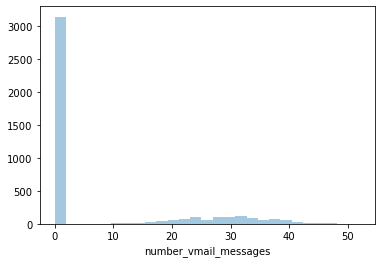

In [13]:
#Distribution of the feature 'number_vmail_messages' 

sns.distplot(churn_df['number_vmail_messages'],kde= False)
# We can see most of the values of the feature is 

<AxesSubplot:xlabel='account_length'>

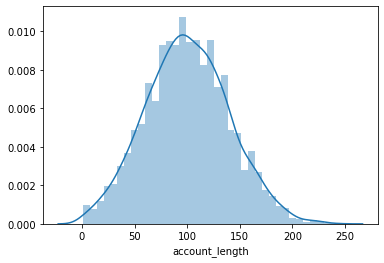

In [14]:
# Here, the mean of 'account length' is approx 100 months. Looks like a perfect normal distribution
sns.distplot(churn_df['account_length'])

<AxesSubplot:xlabel='total_intl_calls'>

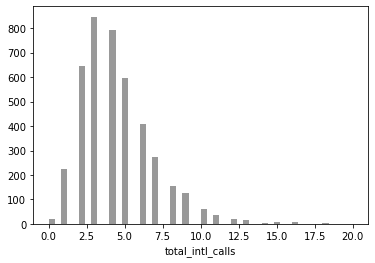

In [15]:
#Distribution of total_intl_calls (Right-skewed Normal distribution) 
sns.distplot(churn_df['total_intl_calls'],kde=False,color= 'Black')

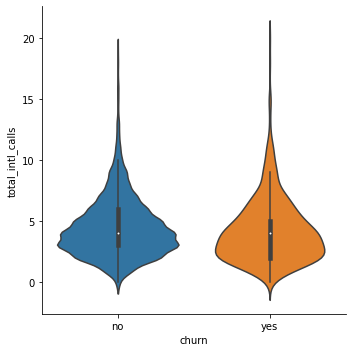

In [16]:
# Both Churn and non-Churn data have almost similiar behaviour w.r.t total_intl_calls
sns.catplot(x='churn',y='total_intl_calls',data =churn_df,kind= 'violin')

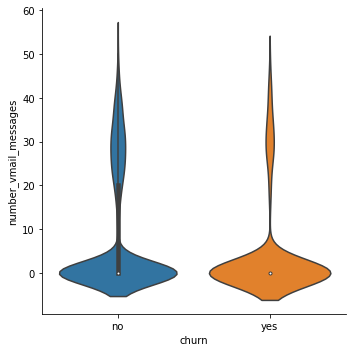

In [17]:
sns.catplot(x='churn',y='number_vmail_messages',data =churn_df,kind= 'violin')
# Both Churn and non-Churn data have most records clusttered at 0 w.r.t number_vmail_messages feature.

<AxesSubplot:>

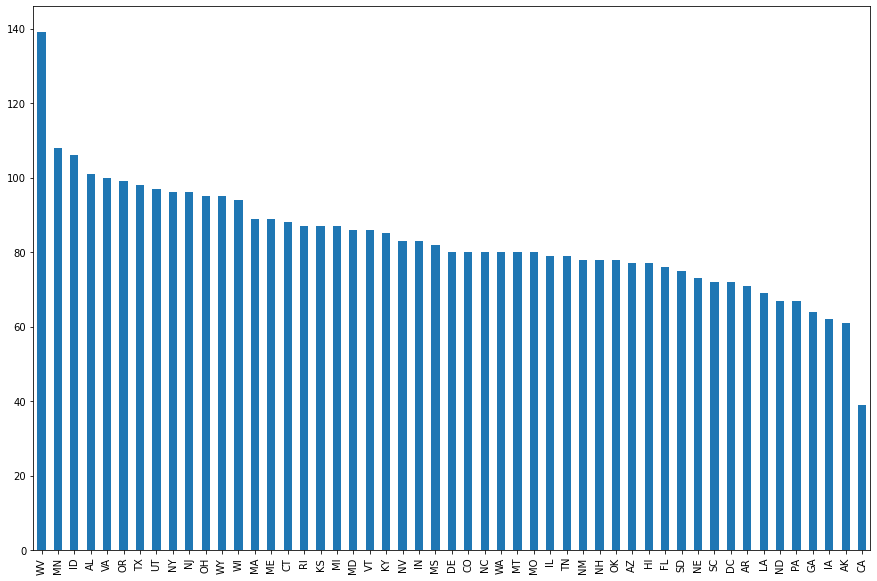

In [18]:
plt.figure(figsize=(15,10))
churn_df['state'].value_counts().plot(kind='bar')

<AxesSubplot:>

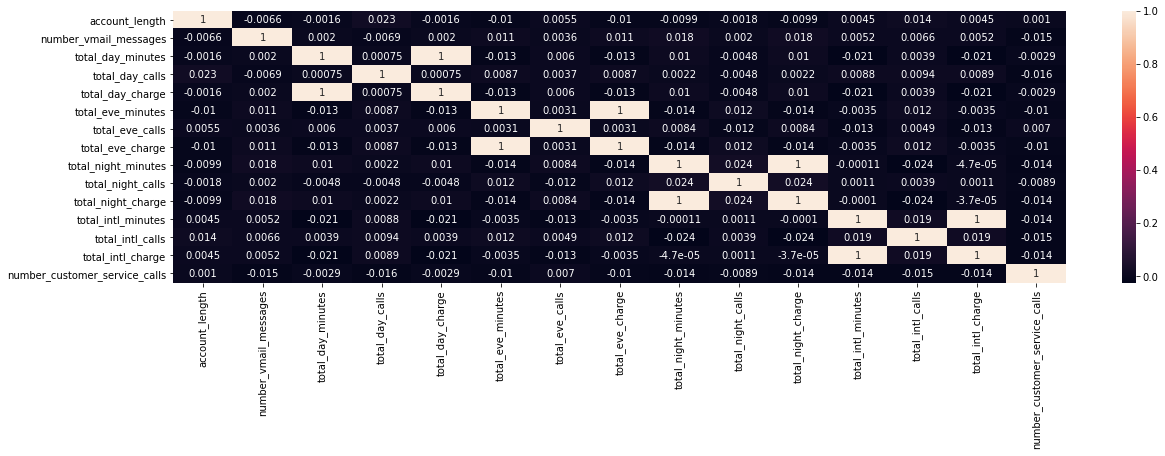

In [19]:
#heatmap of the features
corelation = churn_df.corr()
plt.figure(figsize=(20,5))
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot = True)

In [20]:
churn_data_X= churn_df.iloc[:,:-1]

In [21]:
churn_data_X.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3


In [22]:
churn_data_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [23]:
churn_data_y = churn_df.iloc[:,-1]
print(churn_data_y.tail())

4245    no
4246    no
4247    no
4248    no
4249    no
Name: churn, dtype: object


In [24]:
#one hot encoding
churn_X_new= pd.get_dummies(churn_data_X)
churn_X_new.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,1,0,1,0,0,1
1,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,1,0,1,0,1,0
2,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,1,0,0,0,1,1,0
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,1,0,0,1,1,0
4,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,...,0,0,0,0,0,1,1,0,0,1


In [25]:
churn_X_new.shape

(4250, 73)

In [26]:
churn_X_new.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'state_AK', 'state_AL', 'state_AR',
       'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE',
       'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
       'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD',
       'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT',
       'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM',
       'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA',
       'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_VT', 'state_WA', '

In [27]:
# correlation = churn_X_new.corr()
# plt.figure(figsize = (200,50))
# sns.heatmap(correlation, xticklabels = correlation.columns,yticklabels =correlation.columns,annot = True)

In [28]:
#sns.pairplot(churn_df,hue='churn')

### Perform Test and Train split
By using train_test_split we have split the data into traing dataset and testing datasets.

In [29]:
X_train,X_test,y_train,y_test = train_test_split(churn_X_new,churn_data_y,test_size = 0.2, random_state = 0, stratify = churn_data_y)

We have made a classifier for making the Decision Tree and to train the data using this classifier

In [30]:
churn_predictor = DecisionTreeClassifier(random_state=0,max_depth = 10)
churn_predictor.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

Using churn_predictor classifier we have predicted the value for the X_test and stored it to y_predicted

In [31]:
y_predicted = churn_predictor.predict(X_test)

In [32]:
y_predicted[:10]

array(['no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no'],
      dtype=object)

In [33]:
y_test[:10]

1829     no
1677     no
4197     no
956      no
2503     no
2029    yes
535      no
3847    yes
841      no
1085     no
Name: churn, dtype: object

In [34]:
accuracy_score(y_test,y_predicted)*100

93.64705882352942

### Overfitting in Machine Learning
Overfitting refers to a model that models the training data too well.

Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.

In [35]:
test_accuracies= list()
train_accuracies= list()
depth_list = list()
f1_scr_test= list()
f1_scr_train=list()
for depth in range(5,12):
    churn_predictor = DecisionTreeClassifier(random_state=0,max_depth = depth)
    #scaler = Normalizer()
    #X_train = scaler.fit_transform(X_train)
    churn_predictor.fit(X_train,y_train)
    test_predicted= churn_predictor.predict(X_test)
    train_predicted = churn_predictor.predict(X_train)
    accuracy_test= accuracy_score(y_test,test_predicted)
    accuracy_train= accuracy_score(y_train,train_predicted)
    depth_list.append(depth)
    train_accuracies.append(accuracy_train)
    test_accuracies.append(accuracy_test) 
    confuse_matrix= confusion_matrix(y_test,test_predicted)
    f1_sc_test= f1_score(y_test,test_predicted,average= 'macro')
    f1_sc_train= f1_score(y_train,train_predicted,average= 'macro')
    f1_scr_test.append(f1_sc_test)
    f1_scr_train.append(f1_sc_train)
    print('f1_score : ')
    print(f1_score(y_test,test_predicted,average= 'macro'))
    print('confusion matrix : ')
    print(confuse_matrix,end= '\n--------\n')

f1_score : 
0.8508880178087495
confusion matrix : 
[[709  21]
 [ 37  83]]
--------
f1_score : 
0.859029484029484
confusion matrix : 
[[713  17]
 [ 37  83]]
--------
f1_score : 
0.8693785310734463
confusion matrix : 
[[712  18]
 [ 33  87]]
--------
f1_score : 
0.8851351351351351
confusion matrix : 
[[718  12]
 [ 32  88]]
--------
f1_score : 
0.8805219352156737
confusion matrix : 
[[713  17]
 [ 30  90]]
--------
f1_score : 
0.8642413487133984
confusion matrix : 
[[708  22]
 [ 32  88]]
--------
f1_score : 
0.8691453053518264
confusion matrix : 
[[706  24]
 [ 29  91]]
--------


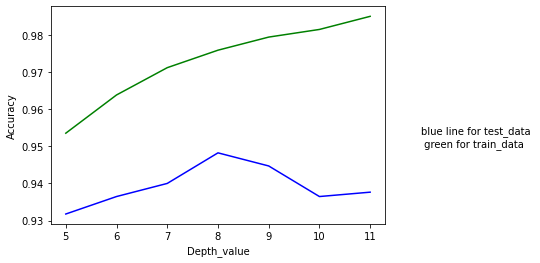

3


In [36]:
#plotting of accuracy
plt.plot(depth_list,test_accuracies,color='blue')
plt.plot(depth_list,train_accuracies,color ='green')
plt.ylabel('Accuracy')
plt.xlabel('Depth_value')
plt.text(12,.95, 'blue line for test_data \n green for train_data')
plt.show()
print(test_accuracies.index(max(test_accuracies)))


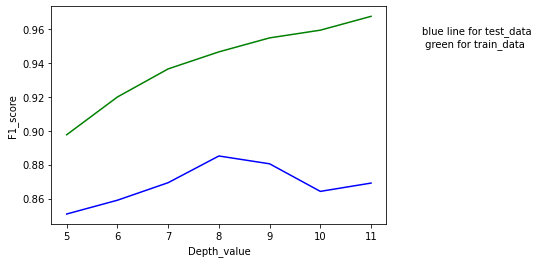

3


In [37]:
#plotting of f1_score
plt.plot(depth_list,f1_scr_test,color='blue')
plt.plot(depth_list,f1_scr_train,color ='green')
plt.ylabel('F1_score')
plt.xlabel('Depth_value')
plt.text(12,.95, 'blue line for test_data \n green for train_data')
plt.show()
print(f1_scr_test.index(max(f1_scr_test)))


In [38]:
churn_predictor = DecisionTreeClassifier(random_state=0,max_depth = 8)
churn_predictor.fit(X_train,y_train)
test_predicted= churn_predictor.predict(X_test)
accuracy_DT= accuracy_score(y_test,test_predicted)
accuracy_DT

0.9482352941176471

In [39]:
confusion_matrix(y_test,test_predicted)

array([[718,  12],
       [ 32,  88]], dtype=int64)

In [40]:
X_train,X_test,y_train,y_test = train_test_split(churn_X_new,churn_data_y,test_size=0.1,random_state=121)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
churn_predictor_GNB = GaussianNB()
churn_predictor_GNB.fit(X_train,y_train)

GaussianNB()

In [41]:
y_predicted_GNB= churn_predictor_GNB.predict(X_test)
y_predicted_GNB[:10]

array(['yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'yes'],
      dtype='<U3')

In [42]:
y_test[:10]

576      no
3264     no
679      no
646     yes
490      no
2980    yes
4133    yes
3561     no
2715     no
3483     no
Name: churn, dtype: object

In [43]:
GNB_accuracy= accuracy_score(y_test,y_predicted_GNB)
GNB_accuracy

0.6094117647058823

In [44]:
y_train_pred=churn_predictor_GNB.predict(X_train)
accuracy_score(y_train,y_train_pred)

0.6324183006535947

In [45]:
# Initialize an instance of class LogisticRegression
X_train,X_test,y_train,y_test = train_test_split(churn_X_new,churn_data_y,test_size=0.2,random_state=121)
scaler = Normalizer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
logistic_model = LogisticRegression(random_state=0, solver='lbfgs')
logistic_model.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [46]:
y_pred_logistic= logistic_model.predict(X_test)
LR_accuracy=accuracy_score(y_test,y_pred_logistic)
LR_accuracy

0.851764705882353

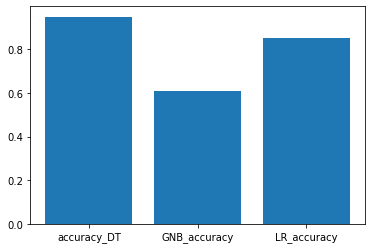

In [47]:
models= ['accuracy_DT','GNB_accuracy','LR_accuracy']
model_score= [accuracy_DT,GNB_accuracy,LR_accuracy]
plt.bar(models,model_score)
plt.show()

In [48]:
#Random Forest
# Create a rf_classifier object with number of trees set to 50
cm_RF= list()
accuracy_RF= list()
for estimators in range(30,34):
    rf_classifier = RandomForestClassifier(n_estimators=estimators,random_state=0)
# Fit the object to train dataset
    rf_classifier.fit(X_train, y_train)
    test_preds  = rf_classifier.predict(X_test)
    accUracy_RF= accuracy_score(y_test,test_preds)
    accuracy_RF.append(accUracy_RF)
# Obtain the confusion matrix on train set
    confuse_matrix=confusion_matrix(y_test,test_preds)
    cm_RF.append(confuse_matrix)
    a= f1_score(y_test,test_preds, average='macro')
    print(a)
    print(confuse_matrix,end = '\n-------------\n')
print(accuracy_RF)
#print(cm_RF,end = '\n')


0.8770455717538145
[[720   4]
 [ 42  84]]
-------------
0.8768264069384194
[[717   7]
 [ 40  86]]
-------------
0.8748727585936888
[[719   5]
 [ 42  84]]
-------------
0.8820678364304015
[[718   6]
 [ 39  87]]
-------------
[0.9458823529411765, 0.9447058823529412, 0.9447058823529412, 0.9470588235294117]


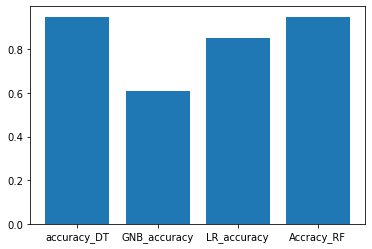

In [49]:
models= ['accuracy_DT','GNB_accuracy','LR_accuracy','Accracy_RF']
model_score= [accuracy_DT,GNB_accuracy,LR_accuracy,accUracy_RF]
plt.bar(models,model_score)
plt.show()

In [50]:
print(f1_score(y_test,test_preds,average='weighted'))
#print(roc_auc_score(y_test,test_preds,average='micro'))
#recall_score(y_test,test_preds,average='weighted')

0.9436599287999864
